In [1]:
# Preamble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf

run_data = pd.read_csv("runningSpeeds.csv")
run_data.head()

,Unnamed: 0,age,pace
0,0,38,3.73
1,1,75,7.53
2,2,35,4.73
3,3,27,4.26
4,4,54,5.40


# Data Exploration

## One-dimensional - Distribution Plots

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


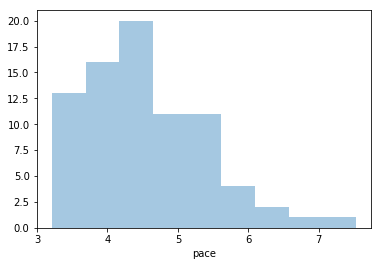

In [2]:
# Histogram
sns.distplot(run_data.pace, kde=False)

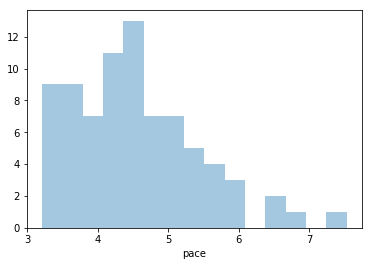

In [3]:
# Histogram - specify # bins
sns.distplot(run_data.pace, bins = 15, kde=False)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


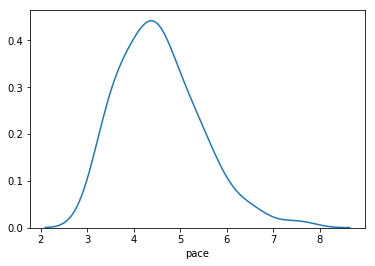

In [4]:
# Density estimate
sns.distplot(run_data.pace, hist=False)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


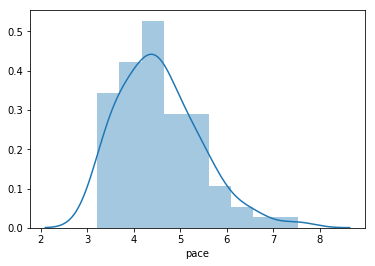

In [5]:
# Both histogram and density estimate
sns.distplot(run_data.pace)

## Two-dimensional - Joint Plots

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


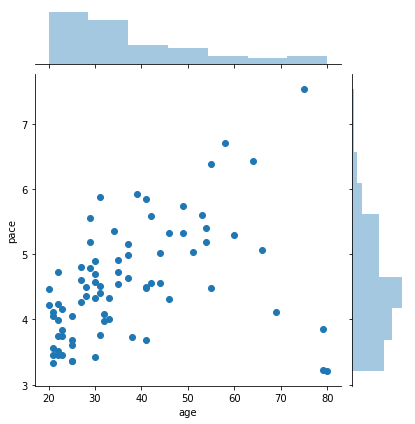

In [6]:
# Joint distribution plot
sns.jointplot(x="age", y="pace", data=run_data)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


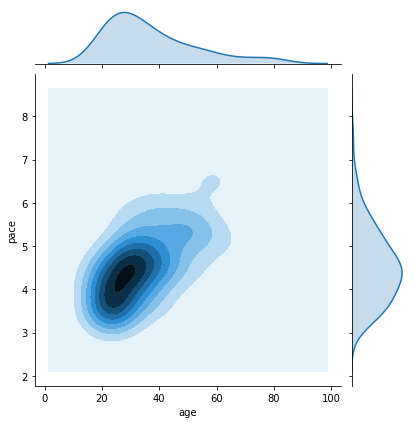

In [7]:
# Joint distribution plot with estimated density
sns.jointplot(x="age", y="pace", data=run_data, kind="kde")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


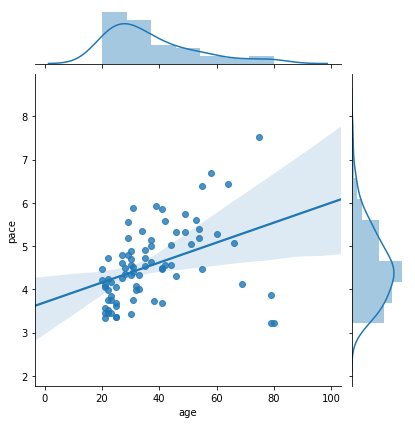

In [8]:
# Joint distribution plot with regression line
sns.jointplot(x="age", y="pace", data=run_data, kind="reg")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


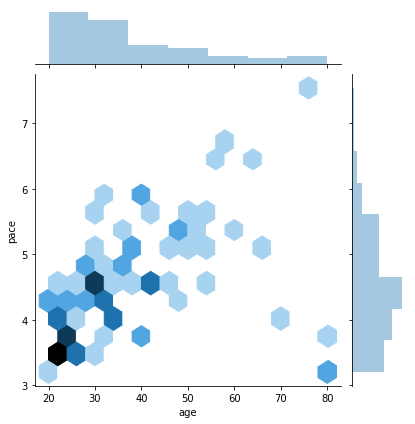

In [9]:
# Joint distribution plot with hexes
sns.jointplot(x="age", y="pace", data=run_data, kind="hex", gridsize=15)

# Maximum Likelihood Example - Laplace Distribution

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


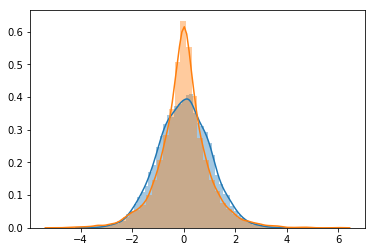

In [10]:
# Generate data

n = 10001
normalData = pd.DataFrame({"data": pd.Series(np.random.normal(0,1,n))})
laplaceData = pd.DataFrame({"data": pd.Series(np.random.laplace(0,1/np.sqrt(2),n))})

# Plot
sns.distplot(normalData)
sns.distplot(laplaceData)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 0.1)

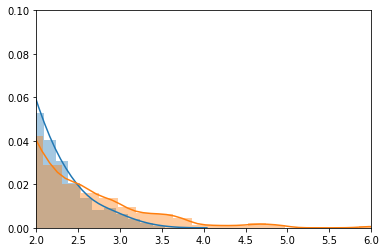

In [11]:
#Zoom in

sns.distplot(normalData)
sns.distplot(laplaceData)
plt.xlim(2,6)
plt.ylim(0,0.1)

In [12]:
## Laplace Negative Log Likelihood
def laplaceNegLogLikelihood(mu, b, y):
    neg_log_lik = -np.sum(np.log(2*b) - np.abs(y - mu) / b)
    return neg_log_lik

In [13]:
## Laplace Maximum Likelihood Estimate for mu
def maximumLikelihood(y):
    # For this demonstration I am fixing b = 1
    RES = so.minimize(laplaceNegLogLikelihood, 1, args=(1,y), method="Powell", tol=1e-8)
    print(RES)
    return RES.x

maximumLikelihood(laplaceData.values)

   direc: array([[-3.07793271e-07]])
     fun: 80.11349111624449
 message: 'Optimization terminated successfully.'
    nfev: 93
     nit: 2
  status: 0
 success: True
       x: array(-0.00206205)


array(-0.00206205)

In [14]:
# Should give same answer as median!
laplaceData.median()

data   -0.002062
dtype: float64

In [15]:
# Laplace Negative Log Likelihood for regression
def laplaceRegNegLogLikelihood(beta, X, y):
    mu = (X@beta).reshape(-1,1)
    return laplaceNegLogLikelihood(mu, 1, y)

In [16]:
# Function to maximize regression log likelihood
def maximumRegLikelihood(X, y, negloglik=laplaceRegNegLogLikelihood):
    ### BEGIN SOLUTION
    nrows,ncols = X.shape
    betas=np.zeros((ncols,1))
    RES = so.minimize(negloglik, betas, args=(X,y), method="Powell", tol=1e-8)
    print(RES)
    return RES.x

age = run_data.age.values
X = np.c_[np.ones(age.size), age]
y = run_data.pace.values.reshape(-1,1)
b,loss = maximumRegLikelihood(X,y)
   

   direc: array([[-1.38691988e-01,  4.62306676e-03],
       [-5.04668518e-05,  9.34573862e-07]])
     fun: -8.796018568583404
 message: 'Optimization terminated successfully.'
    nfev: 568
     nit: 7
  status: 0
 success: True
       x: array([3.33521739, 0.03434783])


In [17]:
# Check against statsmodels - median regression
sad_fit = smf.quantreg('pace ~ age', data = run_data).fit(q = 0.5)
sad_fit.summary()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                   pace   Pseudo R-squared:               0.1344
Model:                       QuantReg   Bandwidth:                      0.8038
Method:                 Least Squares   Sparsity:                        1.891
Date:                Thu, 06 Feb 2020   No. Observations:                   79
Time:                        11:43:49   Df Residuals:                       77
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3352      0.278     11.995      0.000       2.782       3.889
age            0.0343      0.007      4.954      0.000       0.021       0.048
==============================================================================
"""